In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:

X_test.shape

(10000, 28, 28)

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

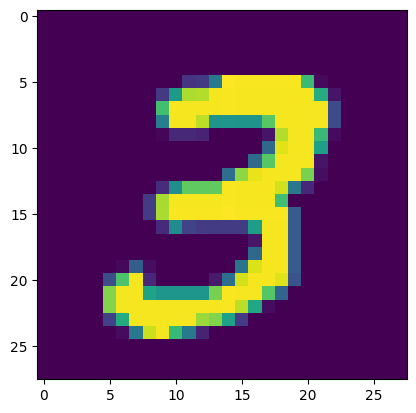

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[7])

In [6]:
X_train = X_train/255
X_test = X_test/255

In [20]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(56,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 56)                7224      
                                                                 
 dense_6 (Dense)             (None, 32)                1824      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 109858 (429.13 KB)
Trainable params: 109858 (429.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [23]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 6s 3ms/step - loss: 0.2845 - accuracy: 0.9159 - val_loss: 0.1648 - val_accuracy: 0.9511
Epoch 2/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1207 - accuracy: 0.9629 - val_loss: 0.1168 - val_accuracy: 0.9665
Epoch 3/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0854 - accuracy: 0.9736 - val_loss: 0.1086 - val_accuracy: 0.9683
Epoch 4/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0675 - accuracy: 0.9793 - val_loss: 0.1097 - val_accuracy: 0.9673
Epoch 5/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0514 - accuracy: 0.9833 - val_loss: 0.0972 - val_accuracy: 0.9748
Epoch 6/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0409 - accuracy: 0.9863 - val_loss: 0.1101 - val_accuracy: 0.9719
Epoch 7/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0381 - accuracy: 0.9869 - val_loss: 0.1258 - val_accuracy:

In [24]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [25]:
y_pred = y_prob.argmax(axis=1)

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9798

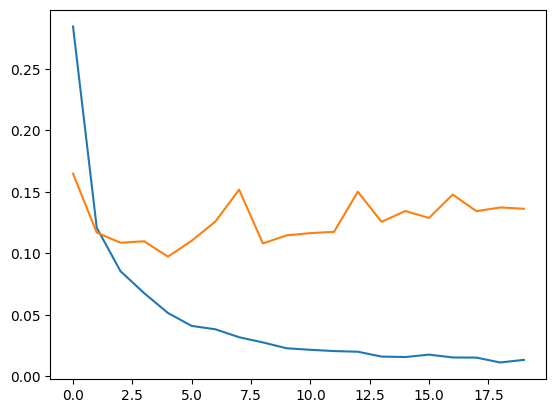

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

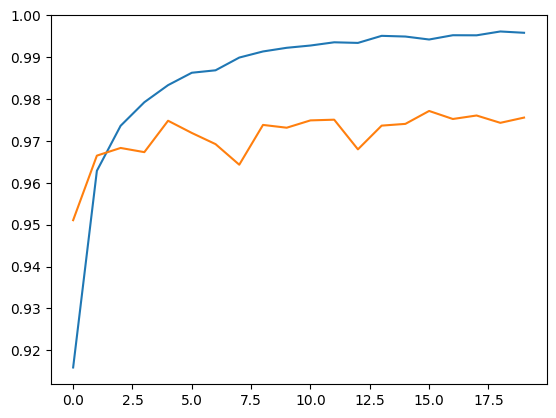

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

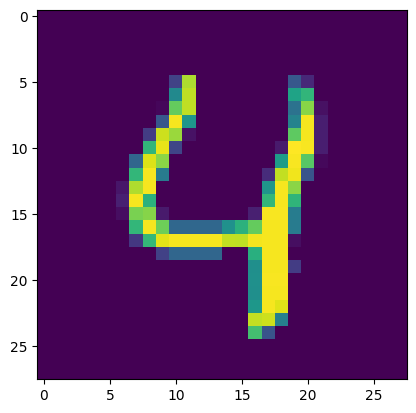

In [29]:
plt.imshow(X_test[4])

In [30]:
model.predict(X_test[4].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 21ms/step


array([4])